# Robustness in network & Bass Model

In [2]:
library(igraph)
library(ggplot2)
library("igraphdata")
data(karate)
data(UKfaculty)
data(USairports)
data(enron)
data(kite)
data(macaque)
data(rfid)

## Robustness in network

the function Nodes.to.protect(g)  takes a graph object g and do the following:

For every node i:

remove it using the function delete_vertices();
then compute the size of the largest connected component after the attack using components(). 
We denote this value by  ri .
Let  r  be the size of the largest connected component before the attack. We define  1−ri / r  to be the rank of node  i .

The function will return the vector  [1−ri/r].


In [3]:
Nodes.to.protect <-function(g){
    g<-simplify(g)
    A<- as.matrix(as_adjacency_matrix(g))
    l<-dim(A)[1]
    set.to.attack<-c(1:l)
    size.max.components.after.attack<-c()
    for(i in 1:l){
    g2 <- delete_vertices(g, i)
    size.max.components.after.attack<- c(size.max.components.after.attack,1-(components(g2, mode = c("weak", "strong"))$csize[1])/l) 
    }
    return(data.frame(set.to.attack,size.max.components.after.attack))
}


In [6]:
# g<-simplify(karate)
# g2 <- delete_vertices(g, 1)
# components(g2, mode = c("weak", "strong"))


In [4]:
rank1 = Nodes.to.protect(karate)
rank1

set.to.attack,size.max.components.after.attack
1,0.20588235
2,0.02941176
3,0.02941176
4,0.02941176
5,0.02941176
6,0.02941176
7,0.02941176
8,0.02941176
9,0.02941176
10,0.02941176


- rank : if the nodes that are deleted are isolated then RANK = 0 
- rank est decreasing with ri; 
- ri : decreases if a node has a high degree ( important ) in the greatest component( the component with the highest number of nodes).
- So the rank gives an information about the belonging of the node to the greatest component

In [11]:
plot_undirected <-function(g,name){
    g2<-as.undirected(g)

    plot(g2, vertex.label= NA, edge.arrow.size=0.02,vertex.size = 100*Nodes.to.protect(g2)$size.max.components.after.attack, xlab = cat(name, "model"))
    }


In [6]:
Nodes.to.protect.2 <-function(g){
    A<- as.matrix(as_adjacency_matrix(g))
    l<-dim(A)[1]
    set.to.attack<-c(1:l)
    size.max.components.after.attack<-c()
    for(i in 1:l){
        set.to.attack.with.neighbors<-  c(i,neighbors(g, i, mode = c("out", "in", "all", "total")))
        g2 <- delete_vertices(g,set.to.attack.with.neighbors)
        size.max.components.after.attack<- c(size.max.components.after.attack,1-(components(g2, mode = c("weak", "strong"))$csize[1])/l)    }
    return(data.frame(set.to.attack,size.max.components.after.attack))
}


In [7]:
g<-karate
rank2 = Nodes.to.protect.2(g)
rank2

set.to.attack,size.max.components.after.attack
1,0.52941176
2,0.85294118
3,0.85294118
4,0.85294118
5,0.20588235
6,0.20588235
7,0.20588235
8,0.85294118
9,0.76470588
10,0.08823529


In [8]:
plot_undirected2 <-function(g,name){
    g2<-as.undirected(g)

    plot(g2, vertex.label= NA, edge.arrow.size=0.02,vertex.size = 10*Nodes.to.protect.2(g2)$size.max.components.after.attack, xlab = cat(name, "model"))
    }

karate modelkarate model

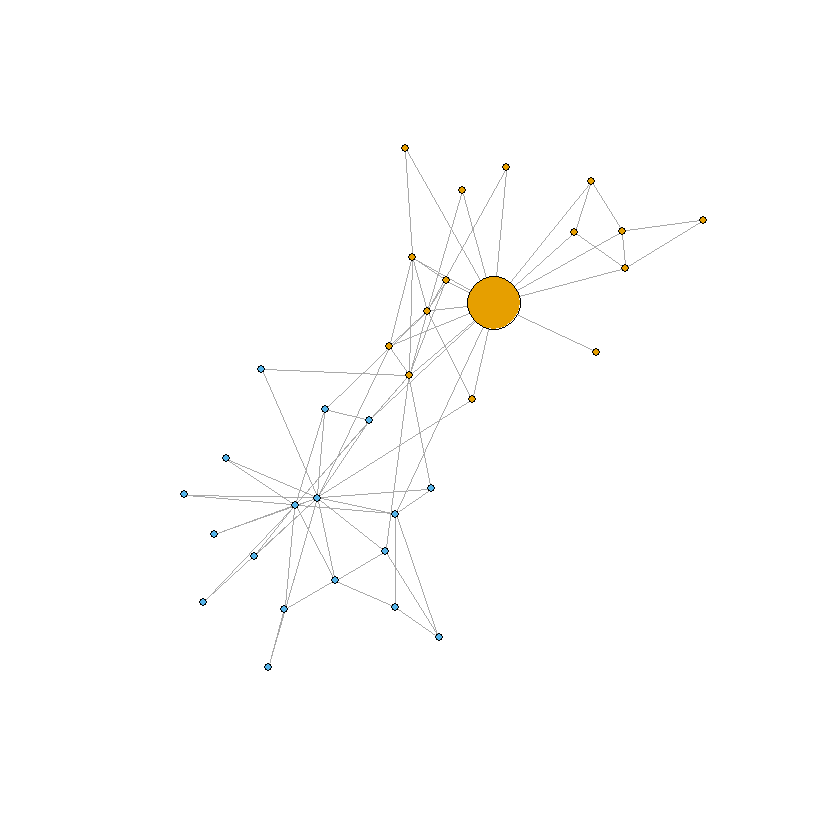

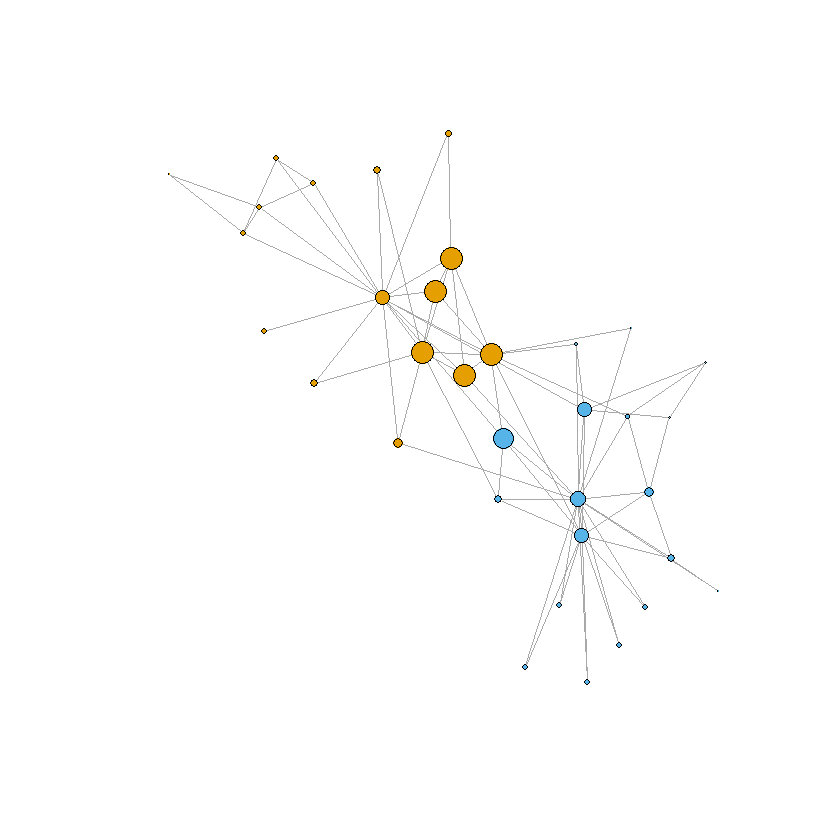

In [12]:
plot_undirected(karate,"karate")
plot_undirected2(karate,"karate")


USairports modelUSairports model

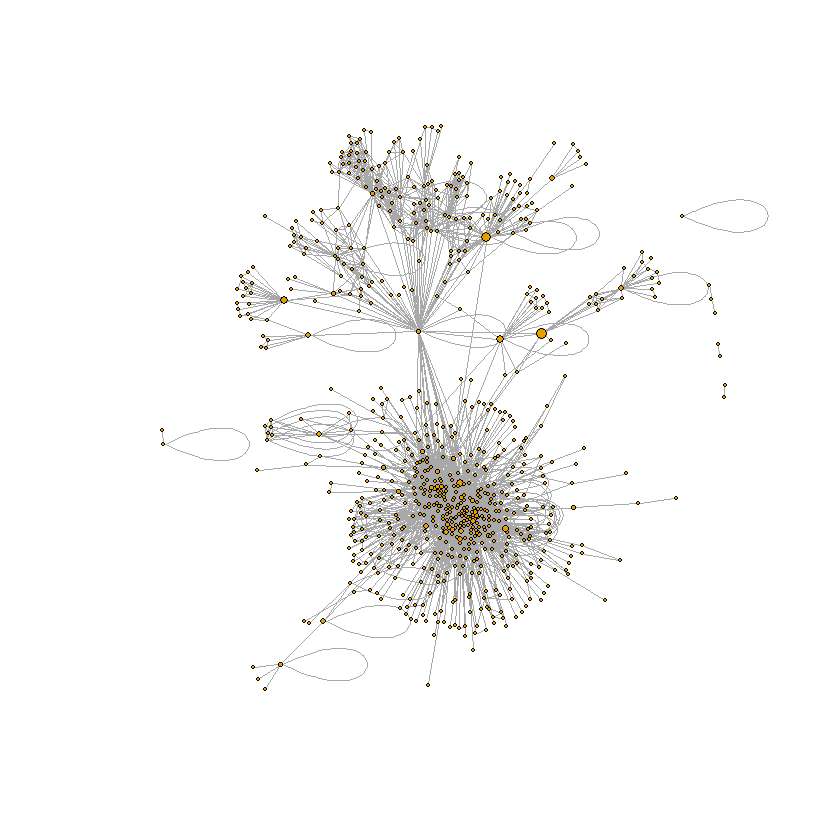

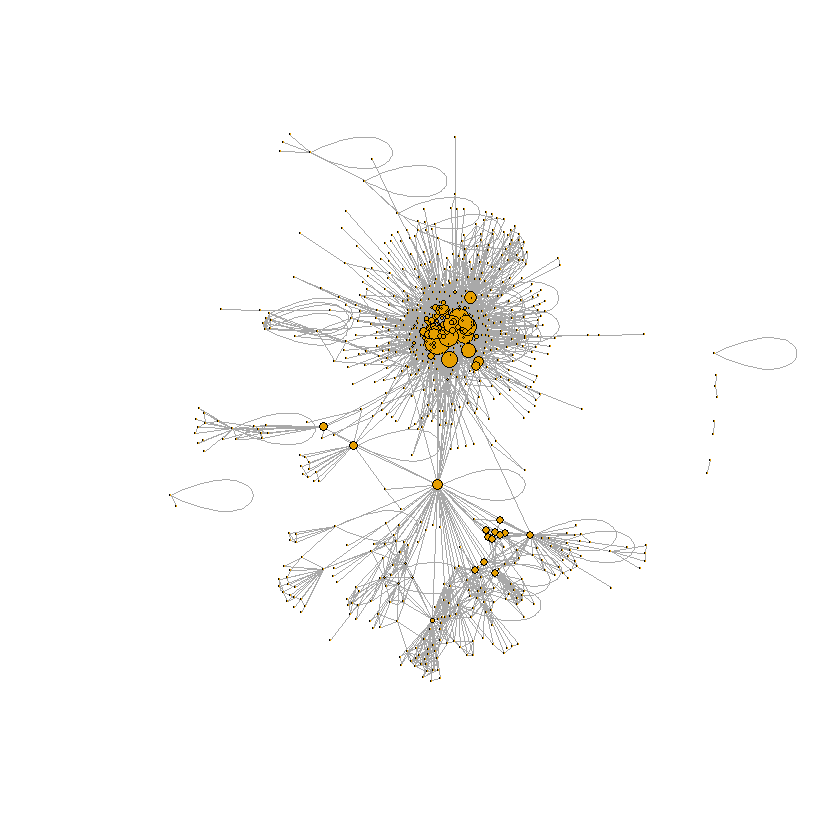

In [13]:
plot_undirected(USairports,"USairports")
plot_undirected2(USairports,"USairports")

UKfaculty modelUKfaculty model

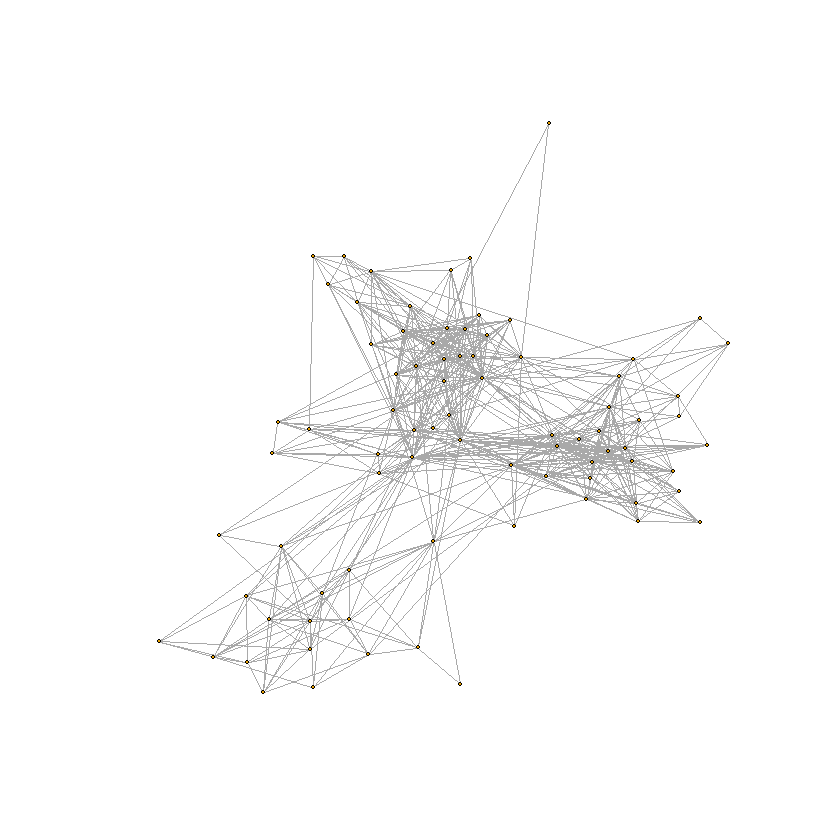

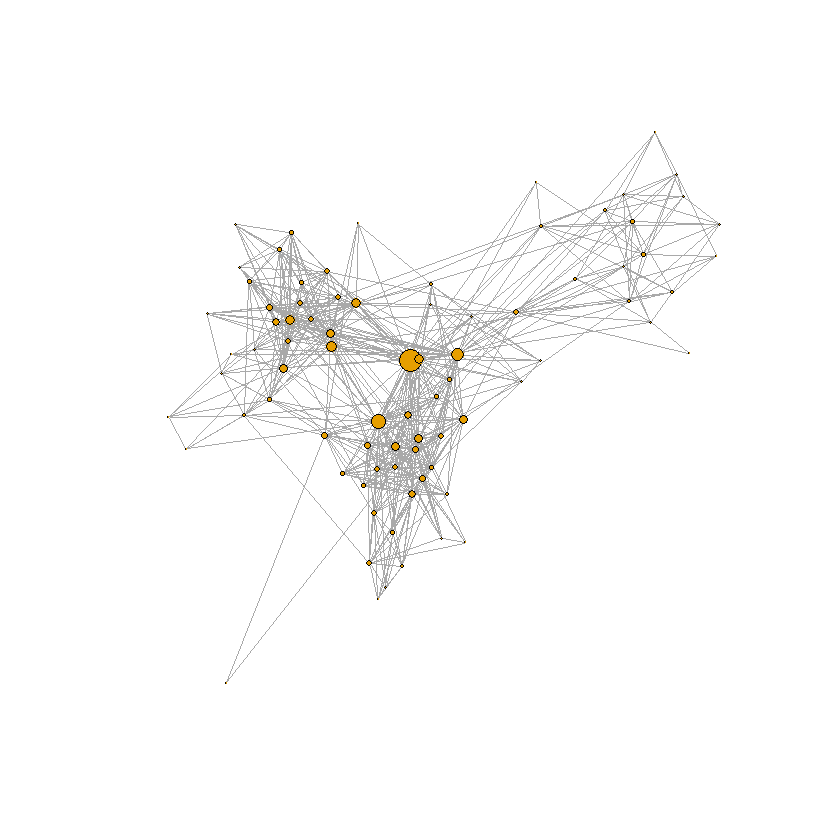

In [14]:
plot_undirected(UKfaculty,"UKfaculty")
plot_undirected2(UKfaculty,"UKfaculty")

Difference between rankings: 
- rank1 gives importance of position of a node in the network. It gives a deeper understanding than a degree of a node : 
a node can have low degree but high rank1 as only that node connects two groups of nodes with large sizes : critical nodes (vulnerable to attacks). node 'i' can have high degree but low rank1 as its removal doesn't affect the connectedness of the network ( there exists alternative nodes that connect same nodes than i).
- rank2 gives influence of not only the node but its neighbors' connections : A node may have low rank1 but high rank2 as its neighbors have high rank1.
So combining the two rankings we get a better understanding of the position of the node in the network.

5/ There are standards measures, other than the ones that you have created above, to rank nodes in a network. These measures are called centrality measures. The famous ones are:
- degree centrality
- betweenness centrality
- closeness centrality
- eigenvector centrality

In [85]:
measures<-function(g){
    g<-as.undirected(g)
    #degree centrality
    degree.cent <- centr_degree(g, mode = "all")
    degree.cent$res
    #Closeness centrality
    closeness.cent <- closeness(g)
    
    betw.cent <- betweenness(g)
    eigenvector.cent <- eigen_centrality(g)$vector
    return(list(degree.cent$res,closeness.cent,betw.cent,eigenvector.cent))
}

In [143]:
corr_res<-function(x,m){
    res = array(0,,dim = c(length(m)))
    
    for (i in c(1:length(m))) {
        res[i] = cor(x$size.max.components.after.attack, unlist(m[i]), method = "spearman")
        }
    return (res)
}

In [165]:
g=kite
m = measures(g)
rank1 = Nodes.to.protect(g)
rank2 = Nodes.to.protect.2(g)
x =corr_res(rank1,m)
y =corr_res(rank2,m)
x_name ="rank1"
y_name = "rank2"

df <- data.frame(x,y)
names(df) <- c(x_name,y_name)
rownames(df) = c("degree centrality","Closeness centrality","Betweenness centrality","eigenvector centrality")
# cat('cor rank1 : ',corr_res(rank1,m),'cor rank2', corr_res(rank2,m))
df

,rank1,rank2
degree centrality,-0.42296085,0.9308176
Closeness centrality,-0.08318943,0.9812692
Betweenness centrality,0.55513611,0.6415094
eigenvector centrality,-0.51034931,0.8828674


In [148]:
g=karate
m = measures(g)
rank1 = Nodes.to.protect(g)
rank2 = Nodes.to.protect.2(g)
x =corr_res(rank1,m)
y =corr_res(rank2,m)
x_name ="rank1"
y_name = "rank2"

df <- data.frame(x,y)
names(df) <- c(x_name,y_name)
rownames(df) = c("degree centrality","Closeness centrality","Betweenness centrality","eigenvector centrality")
# cat('cor rank1 : ',corr_res(rank1,m),'cor rank2', corr_res(rank2,m))
df

,rank1,rank2
degree centrality,0.2814422,0.6923082
Closeness centrality,0.2840936,0.5025799
Betweenness centrality,0.2979595,0.3547629
eigenvector centrality,0.2395391,0.6931329


kite model

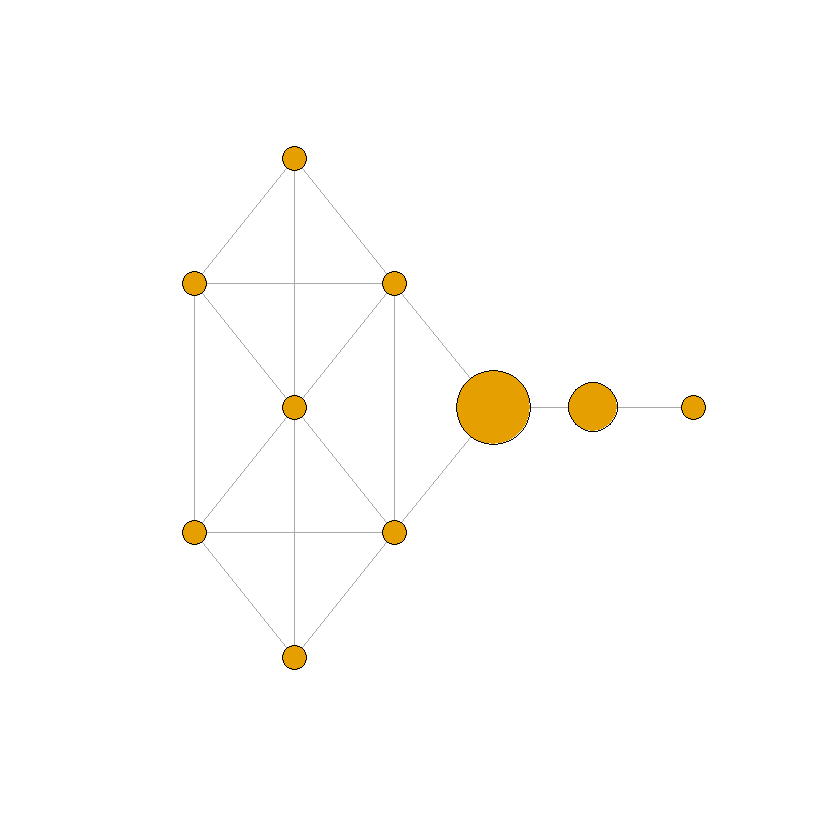

In [15]:
plot_undirected(kite,"kite")

In [164]:
g=kite
clos = measures(g)[2]
rank1 = Nodes.to.protect(g)$size.max.components.after.attack

x_name ="rank1"
y_name = "clos"

df <- data.frame(rank1,clos)
names(df) <- c(x_name,y_name)

df

,rank1,clos
A,0.1,0.05882353
B,0.1,0.05882353
C,0.1,0.05555556
D,0.1,0.06666667
E,0.1,0.05555556
F,0.1,0.07142857
G,0.1,0.07142857
H,0.3,0.06666667
I,0.2,0.04761905
J,0.1,0.03448276


Interpretation:
Rank1 :
It seems like Rank1 isn't highly correlated to any centrality measure. However it's most correlated with the betweenness centrality. This measure gives the importance of a node as a connector, meaning that the more the node is  used to connect two nodes, the higher its betweenness centrality. However this doesn't imply that it's the only node that connects pairs of nodes. And that may explain the low correlation coeffiscient.
For the kite network, the closeness centrality is almost 0. Meaning they're independent. In this network, all nodes excepting two nodes (H and I) have the same rank but different closeness measure. This is why we obtain such a low correlation coeffiscient.

Rank2 :
Considering the 2 networks, The highest pearson correlation regarding rank2 is given by: degree centrality and eigenvector centrality.
- degree centrality is correlated with rank2. The more neighbors a node has, the more probable the node possesses a central node (high rank1) 
- eigenvector centrality is correlated with rank2. eigenvector Centrality is proportional to the sum of the neighbors' centrality. So, eigenvector centrality increases with the degree (more probable the node possesses a central node).


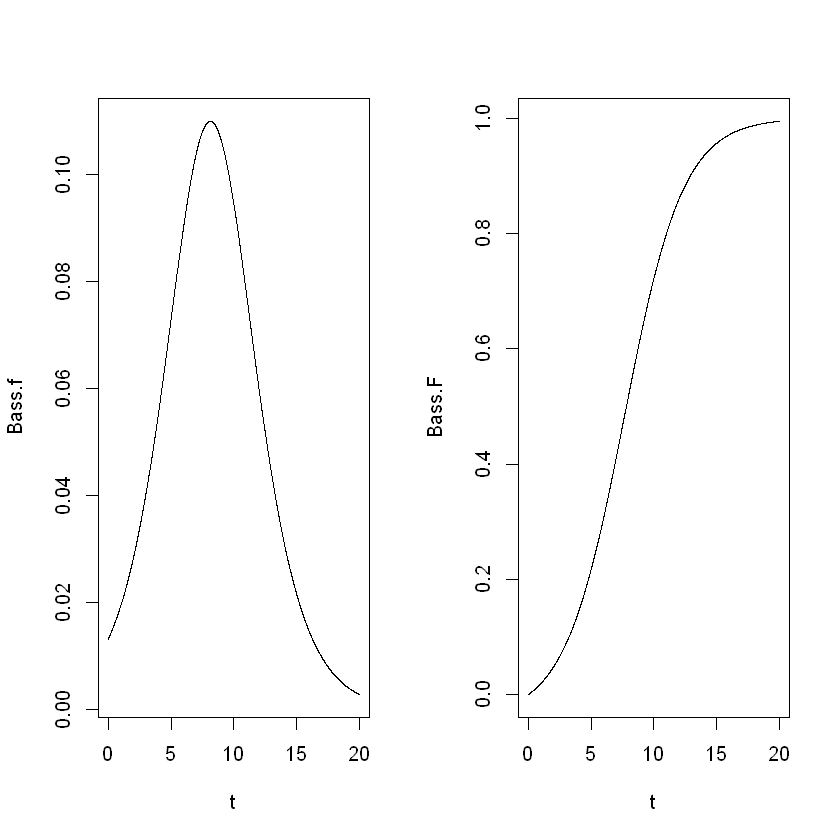

In [176]:
Bass.model <- function(p,q,t.max) {
    t <-seq(from=0,to=t.max,by=0.01)
    Bass.F <- (1-exp(-(p+q)*t))/(1 + (q/p)*exp(-(p+q)*t))# to complete
    Bass.f <- Bass.F - (1-exp(-(p+q)*(t-1)))/(1 + (q/p)*exp(-(p+q)*(t-1)))
    par(mfrow=c(1,2))
    plot(t, Bass.f, type="l");
    plot(t, Bass.F, type="l")
}
Bass.model(0.016, 0.409, 20)


8/ Estimating parameters of the Bass model using nls() function for the data in the data frame df. 

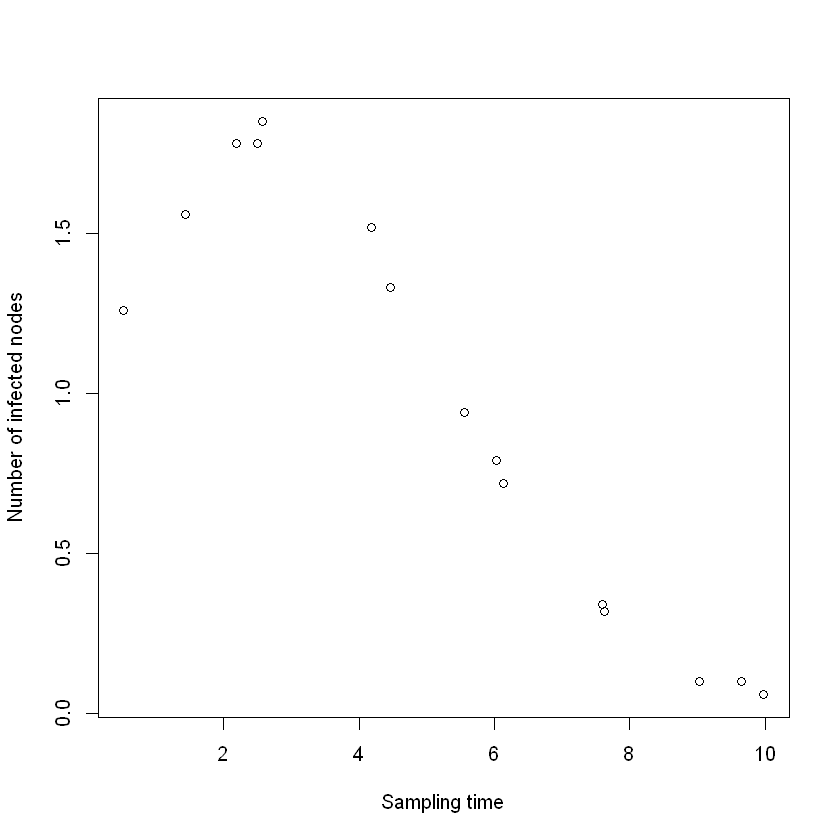

In [197]:
df<-data.frame(sampling.time=c(0.53, 1.44, 2.19, 2.5, 2.58, 4.19, 4.46, 5.56, 6.03, 6.13, 7.59, 7.63, 9.03, 9.65, 9.98), 
               Res=  c( 1.26, 1.56, 1.78, 1.78, 1.85, 1.52, 1.33, 0.94, 0.79, 0.72, 0.34, 0.32, 0.1, 0.1, 0.06 ))
plot(df$sampling.time,df$Res,xlab="Sampling time",ylab = "Number of infected nodes")

In [198]:
Bass.nls<-nls(Res ~ M*(((P+Q)^2/P)*exp(-(P+Q)*sampling.time))/(1+(Q/P)*exp(-(P+Q)*sampling.time))^2,
              data = df,start=c(list(M=sum(df$Res),P=0.1,Q=0.1)))


In [199]:
coef(Bass.nls)

M          P          Q 
10.0724442  0.1003574  0.5009088

In [204]:
M = coef(Bass.nls)[1]
P = coef(Bass.nls)[2]
Q = coef(Bass.nls)[3]

fitted = M * (((P + Q)^2/P) * exp(-(P + Q) *df$sampling.time))/(1 + (Q/P) *exp(-(P + Q) *df$sampling.time))^2
df$fitted = fitted
# #add the fitted values right into the data frame
# df$fitted <- fitted(my_model)

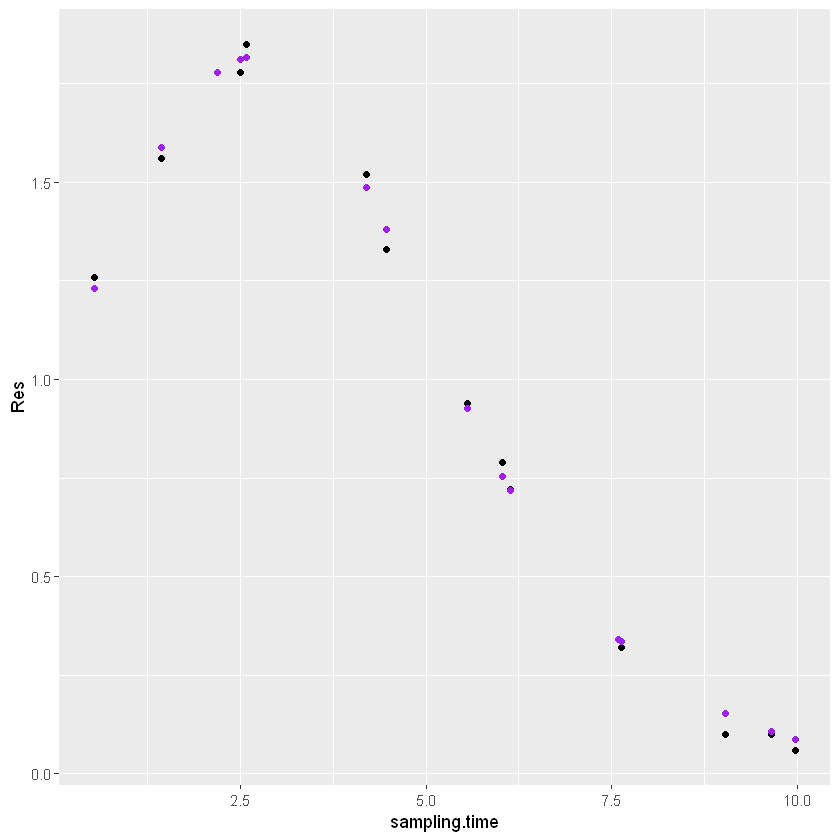

In [218]:
ggplot(data = df,  aes(sampling.time,Res)) +
  # fitted values
  geom_point(aes(y=Res), color = "black") +
  # fitted values
  geom_point(aes(y=fitted), color = "purple")